# **2. Data Cleaning**

## Objectives

* Clean the raw dataset imported from Kaggle

## Inputs

* Identify missing data, duplicated data, erroneously formatted data

## Outputs

* Create outputs/datasets/collection/HousePrices_clean
* Create outputs/datasets/collection/InheritedHouses_clean 


---

# Change working directory

* Change the working directory to ensure files copied and saved to correct locations.

In [129]:
import os

# Get the current directory
current_dir = os.getcwd()
print("Current Directory:", current_dir)

# Change the directory to the new path
os.chdir('/workspace/milestone-project-housing-issues')

# Get the updated current directory
current_dir = os.getcwd()
print("New Current Directory:", current_dir)

Current Directory: /workspace/milestone-project-housing-issues
New Current Directory: /workspace/milestone-project-housing-issues


# Data Exploration and Missing Data

### Loading Data and Raw Data Profile

In [130]:
# Load House Prices dataset
import pandas as pd
df_houseprices = (pd.read_csv("outputs/datasets/collection/HousePrices.csv"))
df_houseprices.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500


In [131]:
# Raw data profile
from ydata_profiling import ProfileReport

pandas_report = ProfileReport(df_houseprices, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Variables with Zero-Values and Missing Data

### Overview of missing data

In [132]:
#Using EvaluateMissingData() function to display missing data
def EvaluateMissingData(df_houseprices):
  missing_data_absolute = df_houseprices.isnull().sum()
  missing_data_percentage = round(missing_data_absolute/len(df_houseprices)*100, 2)
  df_missing_data = (pd.DataFrame(
              data={"RowsWithMissingData": missing_data_absolute,
                  "PercentageOfDataset": missing_data_percentage,
                  "DataType": df_houseprices.dtypes}
                  )
             .sort_values(by=['PercentageOfDataset'], ascending=False)
             .query("PercentageOfDataset > 0")
             )

  return df_missing_data

EvaluateMissingData(df_houseprices)


,RowsWithMissingData,PercentageOfDataset,DataType
EnclosedPorch,1324,90.68,float64
WoodDeckSF,1305,89.38,float64
LotFrontage,259,17.74,float64
GarageFinish,162,11.10,object
BsmtFinType1,114,7.81,object
BedroomAbvGr,99,6.78,float64
2ndFlrSF,86,5.89,float64
GarageYrBlt,81,5.55,float64
MasVnrArea,8,0.55,float64


In [133]:
# Dropping variables with more than 80% missing data -EnclosedPorch and WoodDeckSF

from feature_engine.selection import DropFeatures

df_houseprices_clean = df_houseprices.copy()
variables_method = ['EnclosedPorch', 'WoodDeckSF']
imputer = DropFeatures(features_to_drop = variables_method)
imputer.fit(df_houseprices_clean)
df_houseprices_clean = imputer.transform(df_houseprices_clean)
df_houseprices_clean.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500


### Variables with zero-values

In [134]:
def EvaluateZeroValues(df_houseprices_clean):
    zero_data_absolute = (df_houseprices_clean == 0).sum()
    zero_data_percentage = round(zero_data_absolute / len(df_houseprices_clean) * 100, 2)
    df_zero_data = (pd.DataFrame(
                  data={"RowsWithZeroValues": zero_data_absolute,
                        "PercentageOfDataset": zero_data_percentage,
                        "DataType": df_houseprices_clean.dtypes}
                  )
                 .sort_values(by=['PercentageOfDataset'], ascending=False)
                 .query("PercentageOfDataset > 0")
                 )

    return df_zero_data

EvaluateZeroValues(df_houseprices_clean)

,RowsWithZeroValues,PercentageOfDataset,DataType
MasVnrArea,861,58.97,float64
2ndFlrSF,781,53.49,float64
OpenPorchSF,656,44.93,int64
BsmtFinSF1,467,31.99,int64
BsmtUnfSF,118,8.08,int64
GarageArea,81,5.55,int64
TotalBsmtSF,37,2.53,int64
BedroomAbvGr,6,0.41,float64


In [135]:
# Creating binary variables to replace variables where zero indicates the absence of a feature (2nd floor, porch, basement, masonry veneer)
import numpy as np

df_houseprices_clean['Has2ndFloor'] = df_houseprices_clean['2ndFlrSF'].apply(lambda x: 1 if x >= 1 else 0)
df_houseprices_clean['HasMasVnr'] = df_houseprices_clean['MasVnrArea'].apply(lambda x: 1 if x >= 1 else 0)
df_houseprices_clean['HasOpenPorch'] = df_houseprices_clean['OpenPorchSF'].apply(lambda x: 1 if x >= 1 else 0)
df_houseprices_clean['HasGarage'] = df_houseprices_clean['GarageArea'].apply(lambda x: 1 if x >= 1 else 0)
df_houseprices_clean['HasFinBsmt'] = df_houseprices_clean.apply(lambda x: 1 if x['BsmtFinSF1'] > 0 else (0 if x['BsmtUnfSF'] > 0 else np.nan), axis=1)

In [136]:
# Dropping the original variables with large numbers of zero-values that have been replaced with binary variables

df_houseprices_clean.drop(['2ndFlrSF', 'MasVnrArea', 'OpenPorchSF', 'GarageArea', 'BsmtFinSF1', 'BsmtUnfSF'], axis=1, inplace=True)

In [137]:
# Examining YearRemodAdd variable for value distribution
value_counts = df_houseprices_clean['YearRemodAdd'].value_counts()
value_counts

1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1986      5
1952      5
1983      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

In [138]:
# Create variable for whether modifications made to house
df_houseprices_clean['ModsMade'] = df_houseprices_clean.apply(lambda x: 1 if (x['YearRemodAdd'] > 0 and (x['YearRemodAdd'] - x['YearBuilt']) != 0) else 0, axis=1)
df_houseprices_clean[['YearBuilt', 'YearRemodAdd', 'ModsMade']].head()


,YearBuilt,YearRemodAdd,ModsMade
0,2003,2003,0
1,1976,1976,0
2,2001,2002,1
3,1915,1970,1
4,2000,2000,0


In [139]:
# Dropping YearRemodAdd as data skewed towards 1950 (all pre-1950 values appear set to 1950)

df_houseprices_clean.drop(['YearRemodAdd'], axis=1, inplace=True)

### Recoding categorical to numerical data

In [140]:
for col in df_houseprices_clean.select_dtypes(include='object').columns:
    print(f"{col}: {df_houseprices_clean[col].unique()}")

BsmtExposure: ['No' 'Gd' 'Mn' 'Av' 'None']
BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' nan 'BLQ' 'None' 'LwQ']
GarageFinish: ['RFn' 'Unf' nan 'Fin' 'None']
KitchenQual: ['Gd' 'TA' 'Ex' 'Fa']


In [141]:
# Recode to change object variables to float

mappings = {
    'BsmtExposure': {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
    'BsmtFinType1': {'None': 0, 'Missing': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'GarageFinish': {'None': 0, 'Missing': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},
    'KitchenQual': {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
}

for col, mapping in mappings.items():
    df_houseprices_clean[col] = df_houseprices_clean[col].map(mapping).astype(float)

df_houseprices_clean.head()

,1stFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinType1,GarageFinish,GarageYrBlt,GrLivArea,KitchenQual,LotArea,LotFrontage,...,OverallQual,TotalBsmtSF,YearBuilt,SalePrice,Has2ndFloor,HasMasVnr,HasOpenPorch,HasGarage,HasFinBsmt,ModsMade
0,856,3.0,1.0,6.0,2.0,2003.0,1710,3.0,8450,65.0,...,7,856,2003,208500,1,1,1,1,1.0,0
1,1262,3.0,4.0,5.0,2.0,1976.0,1262,2.0,9600,80.0,...,6,1262,1976,181500,0,0,0,1,1.0,0
2,920,3.0,2.0,6.0,2.0,2001.0,1786,3.0,11250,68.0,...,7,920,2001,223500,1,1,1,1,1.0,1
3,961,NaN,1.0,5.0,1.0,1998.0,1717,3.0,9550,60.0,...,7,756,1915,140000,0,0,1,1,1.0,1
4,1145,4.0,3.0,6.0,2.0,2000.0,2198,3.0,14260,84.0,...,8,1145,2000,250000,0,1,1,1,1.0,0


In [144]:
print(df_houseprices_clean[['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']].dtypes)

BsmtExposure    float64
BsmtFinType1    float64
GarageFinish    float64
KitchenQual     float64
dtype: object


### Recode missing data

In [145]:
#Using EvaluateMissingData() function to display missing data
def EvaluateMissingData(df_houseprices_clean):
  missing_data_absolute = df_houseprices_clean.isnull().sum()
  missing_data_percentage = round(missing_data_absolute/len(df_houseprices_clean)*100, 2)
  df_missing_data = (pd.DataFrame(
              data={"RowsWithMissingData": missing_data_absolute,
                  "PercentageOfDataset": missing_data_percentage,
                  "DataType": df_houseprices_clean.dtypes}
                  )
             .sort_values(by=['PercentageOfDataset'], ascending=False)
             .query("PercentageOfDataset > 0")
             )

  return df_missing_data

EvaluateMissingData(df_houseprices_clean)

,RowsWithMissingData,PercentageOfDataset,DataType
LotFrontage,259,17.74,float64
GarageFinish,162,11.10,float64
BsmtFinType1,114,7.81,float64
BedroomAbvGr,99,6.78,float64
GarageYrBlt,81,5.55,float64
HasFinBsmt,37,2.53,float64


In [146]:
# Apply random sampling from the distribution for LotFrontage, BedroomAbvGr, BsmtFinType1

columns_to_impute = ['LotFrontage', 'BedroomAbvGr', 'BsmtFinType1']

# Apply random sampling from the distribution for each specified column
for col in columns_to_impute:
    df_houseprices_clean[col] = df_houseprices_clean[col].apply(
        lambda x: np.random.choice(df_houseprices_clean[col].dropna()) if pd.isnull(x) else x
    )

In [147]:
# Apply group-based mode imputation to GarageFinish with relationship to OverallCond
df_houseprices_clean['GarageFinish'] = df_houseprices_clean.groupby('OverallCond')['GarageFinish'].apply(lambda x: x.fillna(x.mode()[0]))


In [148]:
# Replace missing values for GarageYrBlt with value from YearBuilt
df_houseprices_clean['GarageYrBlt'].fillna(df_houseprices_clean['YearBuilt'], inplace=True)


In [149]:
# Apply random imputation based on probability distribution for binary variable 
import numpy as np

# Calculate probability of `1` in the binary variable
prob_1 = df_houseprices_clean['HasFinBsmt'].mean()

# Impute missing values randomly based on the probability distribution
df_houseprices_clean['HasFinBsmt'] = df_houseprices_clean['HasFinBsmt'].apply(
    lambda x: np.random.choice([0, 1], p=[1 - prob_1, prob_1]) if pd.isna(x) else x
)

In [150]:
missing_values_count = df_houseprices_clean.isna().sum()
missing_values_count

1stFlrSF        0
BedroomAbvGr    0
BsmtExposure    0
BsmtFinType1    0
GarageFinish    0
GarageYrBlt     0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearBuilt       0
SalePrice       0
Has2ndFloor     0
HasMasVnr       0
HasOpenPorch    0
HasGarage       0
HasFinBsmt      0
ModsMade        0
dtype: int64

In [151]:
df_houseprices_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1stFlrSF      1460 non-null   int64  
 1   BedroomAbvGr  1460 non-null   float64
 2   BsmtExposure  1460 non-null   float64
 3   BsmtFinType1  1460 non-null   float64
 4   GarageFinish  1460 non-null   float64
 5   GarageYrBlt   1460 non-null   float64
 6   GrLivArea     1460 non-null   int64  
 7   KitchenQual   1460 non-null   float64
 8   LotArea       1460 non-null   int64  
 9   LotFrontage   1460 non-null   float64
 10  OverallCond   1460 non-null   int64  
 11  OverallQual   1460 non-null   int64  
 12  TotalBsmtSF   1460 non-null   int64  
 13  YearBuilt     1460 non-null   int64  
 14  SalePrice     1460 non-null   int64  
 15  Has2ndFloor   1460 non-null   int64  
 16  HasMasVnr     1460 non-null   int64  
 17  HasOpenPorch  1460 non-null   int64  
 18  HasGarage     1460 non-null 

In [123]:
df_houseprices_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   1stFlrSF      1460 non-null   int64
 1   BedroomAbvGr  1460 non-null   int64
 2   BsmtExposure  1460 non-null   int64
 3   BsmtFinType1  1460 non-null   int64
 4   GarageFinish  1460 non-null   int64
 5   GarageYrBlt   1460 non-null   int64
 6   GrLivArea     1460 non-null   int64
 7   KitchenQual   1460 non-null   int64
 8   LotArea       1460 non-null   int64
 9   LotFrontage   1460 non-null   int64
 10  OverallCond   1460 non-null   int64
 11  OverallQual   1460 non-null   int64
 12  TotalBsmtSF   1460 non-null   int64
 13  YearBuilt     1460 non-null   int64
 14  SalePrice     1460 non-null   int64
 15  Has2ndFloor   1460 non-null   int64
 16  HasMasVnr     1460 non-null   int64
 17  HasOpenPorch  1460 non-null   int64
 18  HasGarage     1460 non-null   int64
 19  HasFinBsmt    1460 non-null

In [153]:
# Recoding float64 variables to integers

float_columns = df_houseprices_clean.select_dtypes(include='float64').columns
df_houseprices_clean[float_columns] = df_houseprices_clean[float_columns].astype(int)

df_houseprices_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   1stFlrSF      1460 non-null   int64
 1   BedroomAbvGr  1460 non-null   int64
 2   BsmtExposure  1460 non-null   int64
 3   BsmtFinType1  1460 non-null   int64
 4   GarageFinish  1460 non-null   int64
 5   GarageYrBlt   1460 non-null   int64
 6   GrLivArea     1460 non-null   int64
 7   KitchenQual   1460 non-null   int64
 8   LotArea       1460 non-null   int64
 9   LotFrontage   1460 non-null   int64
 10  OverallCond   1460 non-null   int64
 11  OverallQual   1460 non-null   int64
 12  TotalBsmtSF   1460 non-null   int64
 13  YearBuilt     1460 non-null   int64
 14  SalePrice     1460 non-null   int64
 15  Has2ndFloor   1460 non-null   int64
 16  HasMasVnr     1460 non-null   int64
 17  HasOpenPorch  1460 non-null   int64
 18  HasGarage     1460 non-null   int64
 19  HasFinBsmt    1460 non-null

### Exploring impact of removing missing data

In [154]:
#Using DataCleaningEffect() function to examine impact of missing data on variables and dataset
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

df_houseprices_original = df_houseprices.copy()
df_houseprices_cleaned = df_houseprices_clean.copy()

def DataCleaningEffect(df_houseprices_original,df_houseprices_cleaned,variables_applied_with_method):

  flag_count=1 # Indicate plot number
  
  # distinguish between numerical and categorical variables
  categorical_variables = df_houseprices_original.select_dtypes(exclude=['number']).columns

  # scan over variables, 
    # first on variables that you applied the method
    # if the variable is a numerical plot, a histogram if categorical plot a barplot
  for set_of_variables in [variables_applied_with_method]:
    print("\n=====================================================================================")
    print(f"* Distribution Effect Analysis After Data Cleaning Method in the following variables:")
    print(f"{set_of_variables} \n\n")
  

    for var in set_of_variables:
      if var in categorical_variables:  # it is categorical variable: barplot
        
        df1 = pd.DataFrame({"Type":"Original","Value":df_houseprices_original[var]})
        df2 = pd.DataFrame({"Type":"Cleaned","Value":df_houseprices_cleaned[var]})
        dfAux = pd.concat([df1, df2], axis=0)
        fig , axes = plt.subplots(figsize=(15, 5))
        sns.countplot(hue='Type', data=dfAux, x="Value",palette=['#432371',"#FAAE7B"])
        axes.set(title=f"Distribution Plot {flag_count}: {var}")
        plt.xticks(rotation=90)
        plt.legend() 

      else: # it is numerical variable: histogram

        fig , axes = plt.subplots(figsize=(10, 5))
        sns.histplot(data=df_houseprices_original, x=var, color="#432371", label='Original', kde=True,element="step", ax=axes)
        sns.histplot(data=df_houseprices_cleaned, x=var, color="#FAAE7B", label='Cleaned', kde=True,element="step", ax=axes)
        axes.set(title=f"Distribution Plot {flag_count}: {var}")
        plt.legend() 

      plt.show()
      flag_count+= 1


In [155]:
# Mapping numerical values for categorical variables to original dataset to enable comparison

mappings = {
    'BsmtExposure': {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
    'BsmtFinType1': {'None': 0, 'Missing': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'GarageFinish': {'None': 0, 'Missing': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},
    'KitchenQual': {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
}

for col, mapping in mappings.items():
    df_houseprices_original[col] = df_houseprices_original[col].map(mapping).astype(float)

df_houseprices_original.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,1.0,706,6.0,150,0.0,548,2.0,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,4.0,978,5.0,284,NaN,460,2.0,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,2.0,486,6.0,434,0.0,608,2.0,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,1.0,216,5.0,540,NaN,642,1.0,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,3.0,655,6.0,490,0.0,836,2.0,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000



* Distribution Effect Analysis After Data Cleaning Method in the following variables:
      LotFrontage  BedroomAbvGr  BsmtFinType1  GarageFinish  GarageYrBlt
0              65             3             6             2         2003
1              80             3             5             2         1976
2              68             3             6             2         2001
3              60             5             5             1         1998
4              84             4             6             2         2000
...           ...           ...           ...           ...          ...
1455           62             3             1             2         1999
1456           85             3             5             1         1978
1457           66             4             6             2         1941
1458           68             2             3             1         1950
1459           75             3             4             3         1965

[1460 rows x 5 columns] 




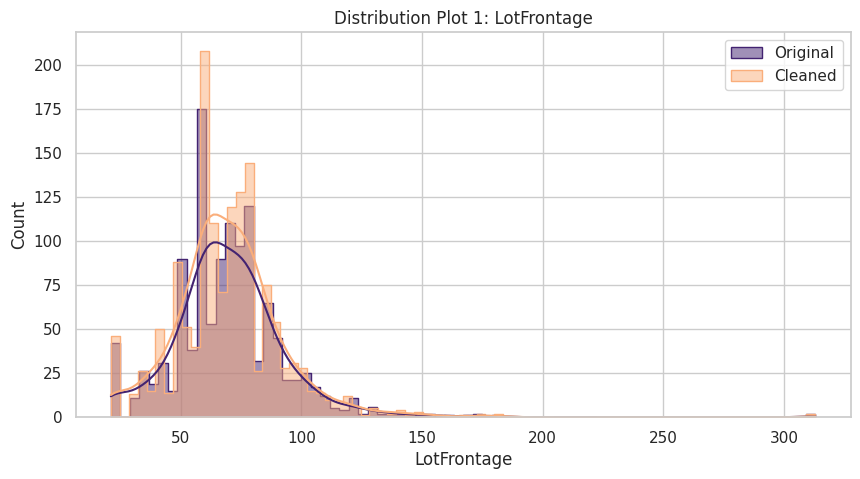

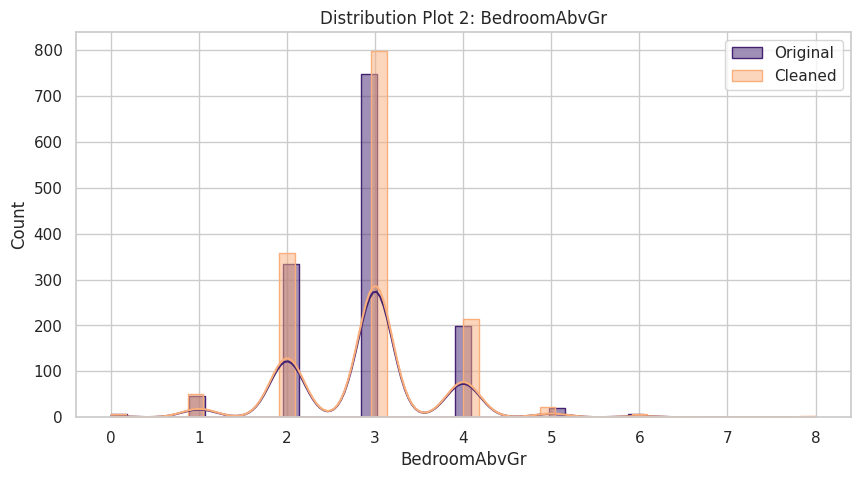

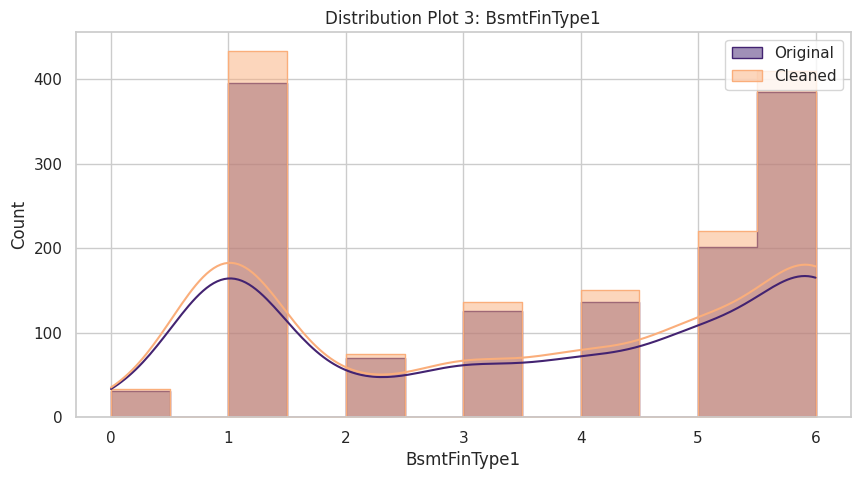

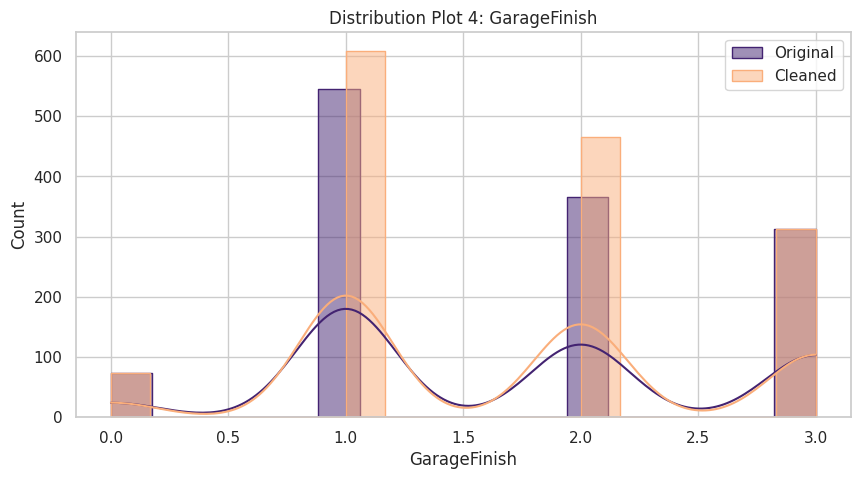

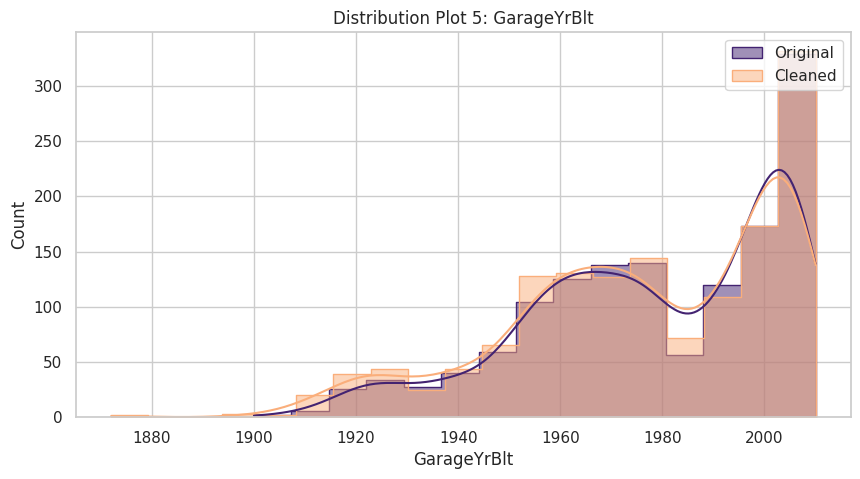

In [156]:
DataCleaningEffect(df_houseprices_original,
df_houseprices_cleaned,
variables_applied_with_method = df_houseprices_clean[['LotFrontage', 'BedroomAbvGr', 'BsmtFinType1', 'GarageFinish', 'GarageYrBlt']])

In [157]:
df_houseprices_cleaned.head()


,1stFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinType1,GarageFinish,GarageYrBlt,GrLivArea,KitchenQual,LotArea,LotFrontage,...,OverallQual,TotalBsmtSF,YearBuilt,SalePrice,Has2ndFloor,HasMasVnr,HasOpenPorch,HasGarage,HasFinBsmt,ModsMade
0,856,3,1,6,2,2003,1710,3,8450,65,...,7,856,2003,208500,1,1,1,1,1,0
1,1262,3,4,5,2,1976,1262,2,9600,80,...,6,1262,1976,181500,0,0,0,1,1,0
2,920,3,2,6,2,2001,1786,3,11250,68,...,7,920,2001,223500,1,1,1,1,1,1
3,961,5,1,5,1,1998,1717,3,9550,60,...,7,756,1915,140000,0,0,1,1,1,1
4,1145,4,3,6,2,2000,2198,3,14260,84,...,8,1145,2000,250000,0,1,1,1,1,0


In [158]:
# Data Exploration of final dataset

from ydata_profiling import ProfileReport

# Generate the profile report using the modified DataFrame with missing data recoded, zeroes addressed, and categorical data turned into numerical
pandas_report = ProfileReport(df_houseprices_cleaned, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Save as new working dataset in Collections folder

In [159]:
# Save as file in collections folder

import os
try:
  os.makedirs(name='outputs/datasets/cleaned')
except Exception as e:
  print(e)


[Errno 17] File exists: 'outputs/datasets/cleaned'


In [160]:
df_houseprices_cleaned.to_csv("outputs/datasets/cleaned/HousePricesClean.csv", index=False)

---

# Conclusions and Next Steps